In [20]:
import astropy
import numpy as np
import pandas as pd
import matplotlib
import scipy
from scipy import stats
import matplotlib.pyplot as plt

In [22]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.color'] = 'Black'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = (9, 6)

In [45]:
def HI_H2(HI, H2, SS = True, LS = True, elem = False, log10 = True, xlim = 0):
    HI = np.array(HI)
    H2 = np.array(H2)
    if log10:
        HI = np.log10(HI)
    if xlim != 0:
        H2 = np.delete(H2, np.where(HI < xlim))
        HI = np.delete(HI, np.where(HI < xlim))
        
    if elem == False:
        plt.title('SMC + LMC', fontsize = 30)
        plt.scatter(HI, H2)
    else:
        plt.title('SMC + LMC (C/Cl)', fontsize = 30)
        plt.scatter(HI, H2, c = 'red')
        
    if SS:
        plt.xlabel('HI Small-Scale Column Densities')
    elif LS:
        plt.xlabel('HI Large-Scale Column Densities')
    else:
        plt.xlabel('HI Total Column Densities')
    plt.ylabel('$H_2$ Column Densities')
    
    return stats.spearmanr(HI, H2, nan_policy = 'omit')

# TOTAL COLUMN DENSITY (USING ALL H2)

In [11]:
# using larger catalogue w/o velocities
FUSE = pd.read_csv('/Users/FRANNYPACK/Downloads/grind!/research/Data/FUSE_info (SMC + LMC).csv')
FUSE = FUSE[((FUSE["DEC_FK5"] < -67.5) & (FUSE["Galaxy"] == 'LMC') & (FUSE["RA_FK5"] > 75)) | ((FUSE["DEC_FK5"] < -69) & (FUSE["Galaxy"] == 'SMC') & (FUSE["RA_FK5"] < 28))]
FUSE = np.array(FUSE['log10_N_MW'])


In [97]:
HI_CD_tot = np.array([3.56822239e+20, 3.21092861e+20, 2.92819931e+20, 3.05690339e+20,
       2.85692563e+20, 2.74402601e+20, 3.41152949e+20, 3.39047517e+20,
       3.21469651e+20, 2.44140048e+20, 3.01205106e+20, 2.39771890e+20,
       3.47491660e+20, 2.90061881e+20, 3.45766782e+20, 2.99516573e+20,
       2.83877717e+20, 2.40250416e+20, 2.87143654e+20, 2.42833406e+20,
       2.71690009e+20, 2.65700063e+20, 2.77117093e+20, 2.88803072e+20,
       2.22937118e+20, 2.93341715e+20, 2.93265119e+20, 2.58535874e+20,
       2.98291770e+20, 2.15788586e+20, 2.40230501e+20, 2.54691401e+20,
       2.57075125e+20, 2.91742955e+20, 2.98660080e+20, 3.48942629e+20,
       3.08708983e+20, 2.85029232e+20, 2.93228510e+20, 2.90768630e+20,
       3.64944164e+20, 4.13406063e+20, 2.84809118e+20, 2.91493340e+20,
       3.40066245e+20, 3.53785230e+20, 3.49750532e+20, 2.78214036e+20,
       2.84637542e+20, 2.17586050e+20, 2.30414659e+20, 2.96302797e+20,
       3.38378451e+20, 4.22879701e+20, 3.02218768e+20, 3.37018434e+20,
       2.47194773e+20] + [5.05846879e+20, 4.67626482e+20, 4.69190779e+20, 4.85649888e+20,
       6.20011264e+20, 4.43573812e+20, 5.57793191e+20, 5.19674689e+20,
       5.28420503e+20, 4.81928402e+20, 5.26097772e+20, 4.68359443e+20,
       4.20417605e+20, 4.46867597e+20, 2.90278353e+20, 4.24391750e+20,
       4.74131862e+20, 4.27774551e+20, 5.38821707e+20, 4.42455723e+20,
       4.98172006e+20, 4.62392948e+20, 4.32232728e+20, 5.23871516e+20,
       5.58732790e+20, 5.29167221e+20, 4.80486405e+20, 5.16940194e+20,
       5.09732359e+20, 5.60667121e+20, 4.75493602e+20, 4.69595294e+20,
       4.73644910e+20, 4.89343016e+20, 5.41349388e+20, 5.71756320e+20,
       4.96249637e+20, 5.87730975e+20, 6.54470838e+20, 5.10448537e+20,
       5.13773742e+20, 4.96501980e+20, 4.14008103e+20, 4.88835727e+20,
       4.75777364e+20, 4.39800816e+20, 5.00589665e+20, 4.46670565e+20,
       5.75860296e+20, 5.34672661e+20, 3.89955468e+20, 4.08403268e+20,
       5.62250418e+20, 3.07567989e+20, 5.21107889e+20, 4.00297316e+20,
       5.37748021e+20, 5.02583071e+20])

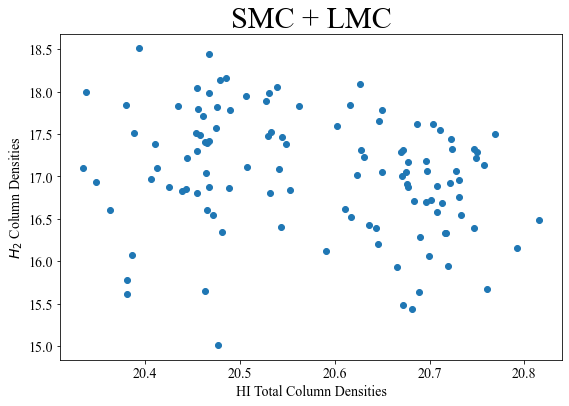

In [31]:
spearman_rank_integrated_tot = HI_H2(HI_CD_tot, FUSE, SS = False, LS = False)

In [29]:
spearman_rank_integrated_tot

SpearmanrResult(correlation=-0.25494358084115837, pvalue=0.005965172179120926)

# TOTAL COLUMN DENSITY (USING ONLY H2 W/H C/CI VELOCITIES)

In [96]:
HI_CD_otherelem_tot = np.array([1.47395884e+20,  9.63377223e+19,  1.31696292e+20,  1.73589875e+20,
        1.19421494e+20,  1.20662324e+20,  1.36146051e+20,  1.48796997e+20,
        1.01420193e+20, -2.35880758e+18,  1.10103687e+20,  1.12011463e+20,
        8.96950008e+19,  9.13432391e+19,  1.28202871e+20,  1.38456934e+20,
        1.45329753e+20,  1.34045187e+18,  1.31531744e+20,  1.07810009e+20,
        9.00050279e+19,  2.05021869e+20,  1.82603091e+20, -5.21782348e+17,
        1.44036771e+20] + [1.03250844e+20, 6.70168874e+19, 1.35861418e+20, 1.28019226e+20,
       1.42352214e+20, 1.21942190e+20, 1.44545361e+20, 1.29861770e+20,
       3.87848988e+19, 1.51409190e+20, 1.59887550e+20, 1.61867199e+20,
       1.03876212e+20, 1.03420099e+20, 1.37317224e+20, 1.43612579e+20,
       1.45368297e+20, 1.02532705e+20, 1.04554513e+20, 1.37213562e+20,
       1.19084771e+20, 1.52765002e+20, 1.18627163e+20, 1.42626476e+20,
       1.14278084e+20, 6.68468149e+19, 5.54534203e+19, 1.13883808e+20,
       3.81409061e+19, 1.07602245e+20, 7.18608034e+19, 4.62894835e+19,
       6.71598239e+19, 1.01738303e+20, 9.63349691e+19, 1.20418241e+20])

In [37]:
# H2 column densities obtained from C/Cl velocities
FUSE_replaced = [18.91863071, 19.25757045, 17.2633051 , 15.33148482, 18.11752679,
       14.87646569, 18.33136258, 19.58028767, 18.33489143, 19.08147792,
       18.47603219, 15.81471393, 16.23903778, 16.8742742 , 16.13756085,
       18.42442499, 17.98569932, 15.42291291, 18.63840054, 18.92302792,
       18.32733192, 15.92399397, 18.5157883 , 19.09210282, 19.53094735] + [18.39195965, 17.54856492, 16.43611886, 16.83321619, 17.22875011,
       18.80383741, 15.93553742, 16.44756974, 16.17533272, 18.1811655 ,
       18.37509716, 18.6732837 , 15.42691603, 15.49675378, 16.87998033,
       16.68674844, 16.74288013, 18.31120449, 17.04064515, 18.26498846,
       16.59552292, 18.18362822, 18.27177237, 18.91014593, 16.41910148,
       16.82077312, 17.02265275, 16.42998346, 17.57805745, 15.52717921,
       18.72863063, 18.25834472, 16.67278358, 16.35600425, 16.35494241,
       15.65305194]

/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_34262/3613764505.py:5: RuntimeWarning: invalid value encountered in log10
  HI = np.log10(HI)


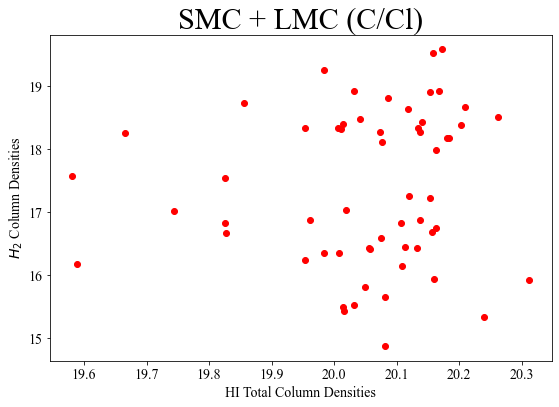

In [46]:
spearman_rank_one_tot = HI_H2(HI_CD_otherelem_tot, FUSE_replaced, SS = False, LS = False, elem = True, xlim = 18.5)

In [47]:
spearman_rank_one_tot

SpearmanrResult(correlation=0.1552493155741487, pvalue=0.2445548594427515)

# SMALL-SCALE COLUMN DENSITY (USING ALL H2)

In [84]:
HI_CD_SS = np.array([ 2.24081427e+19,  1.49941816e+18, -3.20457285e+19, -1.26375704e+19,
       -2.03989183e+19, -2.04608676e+19,  2.37299803e+19,  2.21479569e+19,
        8.99161708e+18, -5.60381638e+19, -3.38218305e+18, -1.93647367e+19,
        2.46375226e+19, -1.61031566e+19,  4.12244298e+19,  7.55967938e+18,
       -1.30479905e+19, -4.72975706e+19,  8.06537251e+18, -3.43244812e+19,
       -1.19107347e+19,  3.31672562e+17, -3.40298794e+18,  1.02159110e+19,
       -3.80859457e+19,  1.64173458e+19,  1.67292396e+19, -1.26312860e+19,
       -1.86533123e+19, -4.54950091e+19, -2.55549997e+19, -1.08439554e+18,
       -2.00313439e+19, -2.98945257e+19, -2.07773166e+19,  1.75542595e+19,
       -2.32119842e+19, -5.08229070e+19, -2.16901416e+19, -4.85657659e+19,
        2.72951746e+19,  7.23682532e+19, -1.69051054e+19, -1.22812769e+19,
        3.58338549e+19,  4.94666771e+19,  1.87259369e+19, -7.95883423e+18,
        2.17063035e+19, -4.54064632e+19, -3.31398030e+19, -3.33509654e+19,
        1.23511339e+19,  2.16828328e+20,  4.18196293e+17,  2.88802183e+19,
       -2.40096683e+19] + [-1.63508410e+19, -2.09281746e+19, -1.95438966e+19, -6.13158155e+18,
        3.87272400e+19, -6.80558352e+19,  2.82659453e+18,  6.76060302e+18,
        6.76154145e+18,  5.61192824e+18,  4.12902027e+19,  3.58038740e+18,
       -3.24554869e+19, -2.21272088e+19, -1.71081776e+20, -2.97208256e+19,
        1.96236942e+19, -1.27092174e+19,  6.69451281e+19,  3.91613166e+18,
        3.01754754e+18,  2.67255681e+19, -4.21175048e+18, -5.50713705e+19,
       -5.35501951e+18, -2.95847104e+19, -2.11481720e+19,  2.70492912e+19,
       -9.85142565e+18,  1.39641050e+19,  1.02324455e+18, -4.74197239e+19,
       -4.81493216e+19,  5.30787613e+19,  3.50690072e+19,  1.11792977e+20,
        1.52086551e+18,  1.46625625e+20,  6.80910458e+19,  1.20426416e+19,
        4.96022502e+18, -6.09899100e+16, -2.67024565e+19,  8.19982979e+18,
       -1.29682387e+18, -3.24986355e+19,  5.16536802e+19, -1.61793741e+19,
        5.55727466e+19,  4.34053229e+19, -4.70532437e+19, -2.54760709e+19,
        9.33272596e+18, -1.53855149e+20, -2.33138332e+19, -6.02239561e+19,
        5.21371406e+19, -1.87815329e+19])

/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_34262/3613764505.py:5: RuntimeWarning: invalid value encountered in log10
  HI = np.log10(HI)


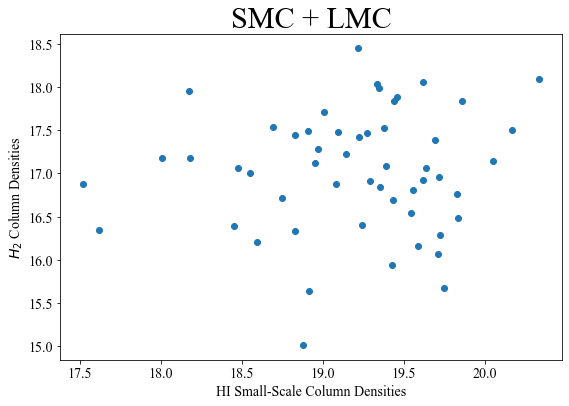

In [63]:
spearman_rank_integrated_SS = HI_H2(HI_CD_SS, FUSE, log10 = True)

In [64]:
spearman_rank_integrated_SS

SpearmanrResult(correlation=0.04612159329140461, pvalue=0.742958294386817)

# SMALL-SCALE COLUMN DENSITY (USING ONLY H2 W/H C/CI VELOCITIES)

In [85]:
HI_CD_otherelem_SS = np.array([ 2.12608605e+18,  1.70864387e+19, -1.44733553e+18,  1.11876545e+19,
        7.18737997e+18,  0.00000000e+00,  1.43635658e+19,  1.14051198e+19,
        0.00000000e+00,  0.00000000e+00, -1.16504604e+19,  0.00000000e+00,
       -7.45320230e+18,  0.00000000e+00,  2.69245189e+19,  1.69417262e+19,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.03993833e+19,  5.56900880e+18,  8.17496131e+18,  0.00000000e+00,
        6.77460571e+18] + [ 1.19643358e+18,  2.48436631e+18, -1.43931790e+18, -6.16644384e+18,
        2.09198800e+18, -2.69604649e+18,  9.74645370e+18, -1.21076549e+19,
       -4.64203364e+17,  6.33812598e+18,  2.01297357e+19,  2.03867224e+19,
        0.00000000e+00, -4.55783194e+18, -3.57661897e+18,  0.00000000e+00,
        1.94285464e+18,  1.43630963e+18,  3.19534572e+18, -5.02265708e+18,
       -2.68148016e+18,  8.87276417e+18,  1.35560944e+19,  3.25832618e+19,
       -9.09932074e+18, -1.32237670e+19,  3.03002315e+18, -6.37495522e+18,
       -7.33963704e+18,  4.29317069e+18, -8.59442060e+18,  1.82012935e+18,
        0.00000000e+00,  6.21965580e+18, -1.01123976e+19,  7.73121711e+18])

/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_34262/3613764505.py:5: RuntimeWarning: divide by zero encountered in log10
  HI = np.log10(HI)
/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_34262/3613764505.py:5: RuntimeWarning: invalid value encountered in log10
  HI = np.log10(HI)


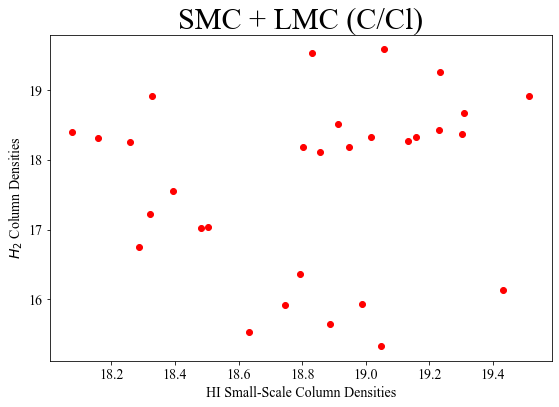

In [61]:
spearman_rank_one_SS = HI_H2(HI_CD_otherelem_SS, FUSE_replaced, elem = True, log10 = True)

In [62]:
spearman_rank_one_SS

SpearmanrResult(correlation=0.2676307007786429, pvalue=0.15276820797963392)

# LARGE-SCALE COLUMN DENSITY (USING ALL H2)

In [95]:
HI_CD_LS = np.array([5.22197720e+20, 4.88554657e+20, 4.88734676e+20, 4.91781469e+20,
       5.81284024e+20, 5.11629647e+20, 5.54966597e+20, 5.12914086e+20,
       5.21658962e+20, 4.76316473e+20, 4.84807569e+20, 4.64779056e+20,
       4.52873092e+20, 4.68994806e+20, 4.61360128e+20, 4.54112575e+20,
       4.54508167e+20, 4.40483769e+20, 4.71876579e+20, 4.38539592e+20,
       4.95154458e+20, 4.35667379e+20, 4.36444478e+20, 5.78942886e+20,
       5.64087809e+20, 5.58751932e+20, 5.01634577e+20, 4.89890903e+20,
       5.19583785e+20, 5.46703016e+20, 4.74470358e+20, 5.17015018e+20,
       5.21794231e+20, 4.36264254e+20, 5.06280381e+20, 4.59963344e+20,
       4.94728772e+20, 4.41105350e+20, 5.86379793e+20, 4.98405895e+20,
       5.08813517e+20, 4.96562970e+20, 4.40710559e+20, 4.80635897e+20,
       4.77074188e+20, 4.72299452e+20, 4.48935985e+20, 4.62849939e+20,
       5.20287549e+20, 4.91267338e+20, 4.37008712e+20, 4.33879338e+20,
       5.52917692e+20, 4.61423137e+20, 5.44421722e+20, 4.60521272e+20,
       4.85610880e+20, 5.21364604e+20] + [3.34414096e+20, 3.19593443e+20, 3.24865660e+20, 3.18327910e+20,
       3.06091481e+20, 2.94863469e+20, 3.17422969e+20, 3.16899560e+20,
       3.12478034e+20, 3.00178212e+20, 3.04587289e+20, 2.59136627e+20,
       3.22854138e+20, 3.06165038e+20, 3.04542352e+20, 2.91956893e+20,
       2.96925708e+20, 2.87547986e+20, 2.79078282e+20, 2.77157887e+20,
       2.83600744e+20, 2.65368391e+20, 2.80520081e+20, 2.78587161e+20,
       2.61023064e+20, 2.76924370e+20, 2.76535879e+20, 2.71167160e+20,
       3.16945082e+20, 2.61283595e+20, 2.65785501e+20, 2.55775797e+20,
       2.77106469e+20, 3.21637481e+20, 3.19437396e+20, 3.31388369e+20,
       3.31920967e+20, 3.35852139e+20, 3.14918651e+20, 3.39334395e+20,
       3.37648990e+20, 3.41037810e+20, 3.01714224e+20, 3.03774617e+20,
       3.04232390e+20, 3.04318553e+20, 3.31024595e+20, 2.86172871e+20,
       2.62931238e+20, 2.62992514e+20, 2.63554462e+20, 3.29653762e+20,
       3.26027317e+20, 2.06051374e+20, 3.01800571e+20, 3.08138216e+20,
       2.71204441e+20])

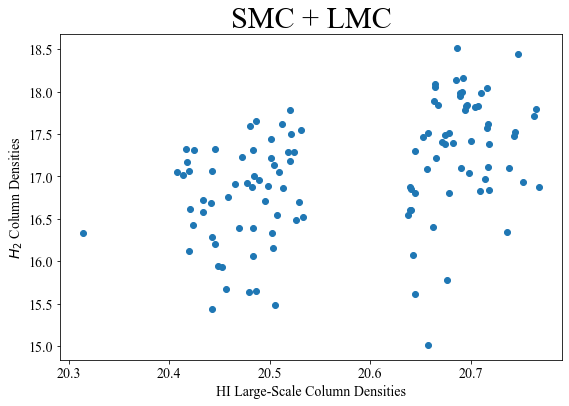

In [72]:
spearman_rank_integrated_LS = HI_H2(HI_CD_LS, FUSE, SS = False, log10 = True)

In [73]:
spearman_rank_integrated_LS

SpearmanrResult(correlation=0.48981298824272085, pvalue=2.765783550299461e-08)

# LARGE-SCALE COLUMN DENSITY (USING ONLY H2 W/H C/CI VELOCITIES)

In [94]:
HI_CD_otherelem_LS = np.array([ 1.45269798e+20,  7.92512836e+19,  1.33143628e+20,  1.62402221e+20,
        1.12234114e+20,  1.20662324e+20,  1.21782485e+20,  1.37391877e+20,
        1.01420193e+20, -2.35880758e+18,  1.21754147e+20,  1.12011463e+20,
        9.71482031e+19,  9.13432391e+19,  1.01278352e+20,  1.21515208e+20,
        1.45329753e+20,  1.34045187e+18,  1.31531744e+20,  1.07810009e+20,
        7.96056446e+19,  1.99452861e+20,  1.74428130e+20, -5.21782348e+17,
        1.37262165e+20] + [1.02054411e+20, 6.45325211e+19, 1.37300736e+20, 1.34185670e+20,
       1.40260226e+20, 1.24638237e+20, 1.34798907e+20, 1.41969425e+20,
       3.92491022e+19, 1.45071064e+20, 1.39757815e+20, 1.41480477e+20,
       1.03876212e+20, 1.07977931e+20, 1.40893843e+20, 1.43612579e+20,
       1.43425442e+20, 1.01096395e+20, 1.01359168e+20, 1.42236219e+20,
       1.21766251e+20, 1.43892238e+20, 1.05071068e+20, 1.10043214e+20,
       1.23377405e+20, 8.00705819e+19, 5.24233972e+19, 1.20258763e+20,
       4.54805431e+19, 1.03309075e+20, 8.04552240e+19, 4.44693542e+19,
       6.71598239e+19, 9.55186477e+19, 1.06447367e+20, 1.12687024e+20])

/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_34262/3613764505.py:5: RuntimeWarning: invalid value encountered in log10
  HI = np.log10(HI)


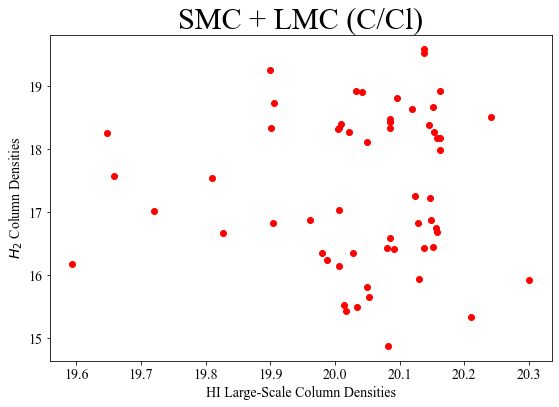

In [78]:
spearman_rank_otherelem_LS = HI_H2(HI_CD_otherelem_LS, FUSE_replaced, elem = True, SS = False, log10 = True, xlim = 19.5)

In [77]:
spearman_rank_otherelem_LS

SpearmanrResult(correlation=0.07151865637208157, pvalue=0.5936895572516663)

# CALCULATING FRACTION OF SMALL-SCALE/LARGE-SCALE IN TOTAL COLUMN DENSITY

Using non-log-10 values (but only those > 0 for SS, since some are < 0)

For integrated values

In [98]:
SS_frac = np.sum(HI_CD_SS[np.where(HI_CD_SS > 0)]) / np.sum(HI_CD_tot[np.where(HI_CD_SS > 0)])
SS_frac

0.0701369691666396

In [99]:
LS_frac_tot = np.sum(HI_CD_LS[np.where(HI_CD_SS > 0)]) / np.sum(HI_CD_tot[np.where(HI_CD_SS > 0)])
LS_frac_tot

0.8934612985676169

In [101]:
SS_frac_otherelem = np.sum(HI_CD_otherelem_SS[np.where(HI_CD_otherelem_SS > 0)]) / np.sum(HI_CD_otherelem_tot[np.where(HI_CD_otherelem_SS > 0)])
SS_frac_otherelem


0.07430207091713034

In [102]:
LS_frac_otherelem = np.sum(HI_CD_otherelem_LS[np.where(HI_CD_otherelem_SS > 0)]) / np.sum(HI_CD_otherelem_tot[np.where(HI_CD_otherelem_SS > 0)])
LS_frac_otherelem


0.9256979299087518